In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Cell 2: Load the dataset
file_path = "River.csv" 
data = pd.read_csv(file_path)

In [3]:
# Cell 3: Initial exploration
print("Dataset Shape:", data.shape)
print("\nDataset Columns:", data.columns)
print("\nDataset Info:")
data.info()
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Cell 4: Filter relevant columns for analysis
columns_of_interest = ['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 
                       'Chlorine', 'Total Dissolved Solids','Target']
filtered_data = data[columns_of_interest]

Dataset Shape: (128978, 9)

Dataset Columns: Index(['Index', 'pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine',
       'Total Dissolved Solids', 'Target'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128978 entries, 0 to 128977
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   128978 non-null  int64  
 1   pH                      126457 non-null  float64
 2   Nitrate                 126728 non-null  float64
 3   Color                   128844 non-null  object 
 4   Turbidity               127865 non-null  float64
 5   Odor                    125268 non-null  float64
 6   Chlorine                127705 non-null  float64
 7   Total Dissolved Solids  128940 non-null  float64
 8   Target                  128978 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 8.9+ MB

First 5 rows of the dataset:
   


Filtered Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 118290 entries, 0 to 128977
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      118290 non-null  float64
 1   Nitrate                 118290 non-null  float64
 2   Color                   118290 non-null  int32  
 3   Turbidity               118290 non-null  float64
 4   Odor                    118290 non-null  float64
 5   Chlorine                118290 non-null  float64
 6   Total Dissolved Solids  118290 non-null  float64
 7   Target                  118290 non-null  int64  
dtypes: float64(6), int32(1), int64(1)
memory usage: 7.7 MB


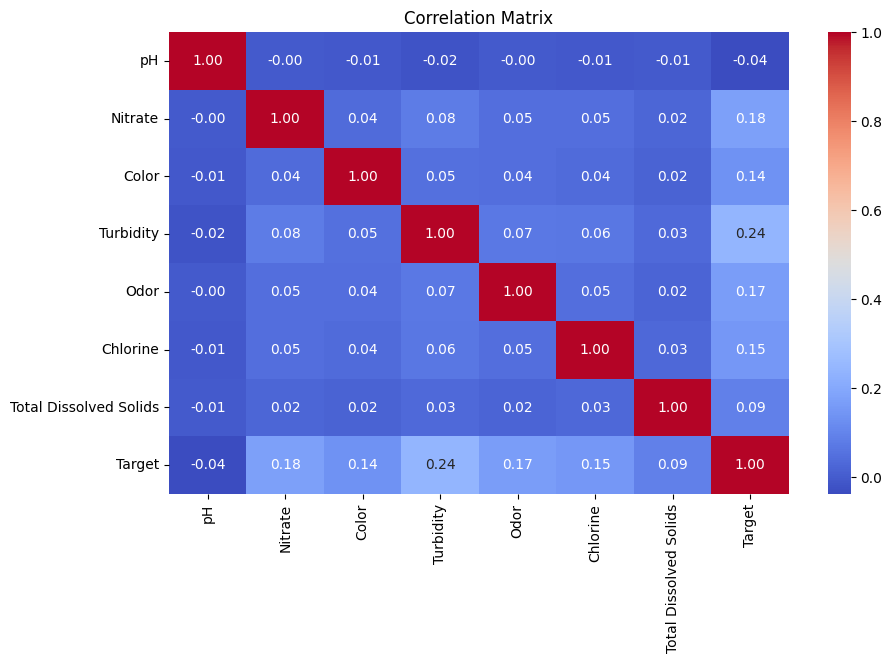

In [4]:
# Cell 5: Handle missing data if any
filtered_data.isnull().sum()  # Check for missing values
filtered_data = filtered_data.dropna()  # Drop rows with missing values

# Convert categorical columns to numeric (e.g., 'Color' column)
label_encoder = LabelEncoder()
filtered_data['Color'] = label_encoder.fit_transform(filtered_data['Color'])

# Check if the data is now numeric
print("\nFiltered Data Info:")
filtered_data.info()

# Cell 6: Data visualization - Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Cell 8: Split the data into features and target
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 9: Build and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Cell 10: Evaluate the Naive Bayes model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8075

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     18187
           1       0.64      0.38      0.48      5471

    accuracy                           0.81     23658
   macro avg       0.74      0.66      0.68     23658
weighted avg       0.79      0.81      0.79     23658


Confusion Matrix:
[[17020  1167]
 [ 3386  2085]]
